<a href="https://colab.research.google.com/github/karsarobert/DeepLearning2024/blob/main/02/PTE_DL2_ENG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Deep Learning practice
#2. practice: tensorflow, regression, classification, regularization
11th of September 2024
##PTE DL2

# What is deep learning? #

Some of the most impressive advancements in artificial intelligence in recent years have been in the area of *deep learning*. Tasks like natural language translation, image recognition, and game playing are all areas where deep learning models have approached or even surpassed human-level performance.

What is deep learning? **Deep learning** is an approach to machine learning characterized by deep computational networks. It is this computational depth that allows deep learning models to disentangle the complex and hierarchical patterns found in even the most difficult real-world datasets.

**Neural networks** have become the defining model of deep learning because of their power and scalability.  Neural networks are made of *neurons*, where each individual neuron performs only a simple computation. The power of neural networks instead comes from the complexity of connections that neurons can form.


# The Neuron #

So let's begin with the fundamental building block of neural networks: the individual neuron. A **neuron** (or **unit**) with one input looks like this:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/mfOlDR6.png" width="250" alt="Diagram of a linear unit.">
<figcaption style="textalign: center; font-style: italic"><center>The linear unit: $y = w x + b$.
</center></figcaption>
</figure>

The input is `x`. Its connection to the neuron has a **weight**, which is `w`. Whenever a value flows across a connection, we multiply the value by the connection's weight. For the input `x` reaching the neuron, this is `w * x`. Neural networks "learn" by adjusting these weights.

The `b` is a special kind of weight called a **bias**. The bias does not have any input data associated with it; instead, we draw a `1` into the diagram, so the value flowing into the neuron is just `b` (since `1 * b = b`). The bias allows the neuron to modify the output independent of the inputs.

The `y` is the value that the neuron ultimately outputs. To find its output, the neuron sums up all the values it receives across its connections. The activation of this neuron is `y = w * x + b`, or in formula, $y = w x + b$.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margó:24px;">
    <strong>Does the formula $y=w x + b$ look familiar?</strong><br>
It's the equation of a straight line! This is the slope-intercept form, where $w$ is the slope and $b$ is the y-intercept.
</blockquote>

# Example - The Linear Unit as a Model #

While individual neurons usually work as part of a larger network, it's often helpful to start with a model consisting of only a single neuron. Models consisting of a single neuron are *linear* models.

Consider how this could work on a dataset like [80 Cereals](https://www.kaggle.com/crawford/80-cereals). If we train a model with `'sugars'` (grams of sugar per serving) as the input and `'calories'` (calories per serving) as the output, then the bias is `b=90`, and the weight is `w=2.5`. We can thus estimate the calorie content of a cereal that contains 5 grams of sugar per serving as follows:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/yjsfFvY.png" width="1000" alt="Calculation with a linear unit.">
<figcaption style="textalign: center; font-style: italic"><center>Calculation with a linear unit.
</center></figcaption>
</figure>

And comparing with our formula, we have $calories = 2.5 * 5 + 90 = 102.5$, as expected.

# Multiple Inputs #

The *80 Cereals* dataset has many more features than just `'sugars'`. What if we want to extend our model to include things like fiber or protein content? That's easy enough. We simply add more input connections to the neuron, one for each additional feature. To find the output, we would multiply each input by its connection weight, and then add them all up.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/vyXSnlZ.png" width="300" alt="Three input connections: x0, x1, and x2, plus the bias.">
<figcaption style="textalign: center; font-style: italic"><center>A linear unit with three inputs.
</center></figcaption>
</figure>

The formula for this neuron would be: $y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b$. A linear unit with two inputs fits a plane, one with more inputs fits a hyperplane.

# Linear Units in Keras #

In Keras, the easiest way to create a model is with `keras.Sequential`, which builds a neural network as a *sequence of layers*. Models like the one above can be created using a *dense layer* (which we'll learn more about in the next section).

We can define a linear model that takes three input features (`'sugars'`, `'fiber'`, and `'protein'`) and produces a single output (`'calories'`) like so:
"""




In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[3])
])

We can also create the model like this, look at the functional classes!!!

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_shape=[3]))

The first argument, `units`, determines how many outputs we want. Since we are only predicting `'calories'`, we use `units=1`.

The second argument, `input_shape`, tells Keras the dimensions of our inputs. Setting `input_shape=[3]` ensures that the model will accept three features as inputs (`'sugars'`, `'fiber'`, and `'protein'`).

This model is now ready to be fit to training data!

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margó:24px;">
    <strong>Why is <code>input_shape</code> a Python list?</strong><br>
The data we'll use in this course will typically be tabular data, like in a Pandas DataFrame. We'll have one input for each feature in the dataset. Features are arranged in columns, so we'll always have <code>input_shape=[num_columns]</code>.

Keras uses a list here to allow for the use of more complex datasets. For example, image data might require three dimensions: <code>[height, width, channels]</code>.
</blockquote>




# Neural Network

In this lesson, we will see how we can build neural networks that are capable of learning the kinds of complex relationships that deep neural networks are famous for.

The key idea here is *modularity*: building a complex network from simpler functional units. We saw how a linear unit computes a linear function -- now we'll see how we can combine and modify these individual units to model more complex relationships.

# Layers #

Neural networks typically organize their neurons into **layers**. If we collect together linear units that share a common input, we get a **dense** layer.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/2MA4iMV.png" width="300" alt="Three circles stacked in an input layer connected to two circles in a dense layer.">
<figcaption style="textalign: center; font-style: italic"><center>A dense layer with two linear units, each receiving two inputs and a bias.
</center></figcaption>
</figure>

You can also think of each layer of a neural network as performing some kind of relatively simple transformation. Through a deep sequence of layers, the neural network can transform its inputs in increasingly complex ways. In a well-trained neural network, each layer will be a transformation that takes us a little closer to the solution.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margó:24px;">
    <strong>Many Kinds of Layers</strong><br>
"Layer" is a very general thing in Keras. A layer can be essentially any kind of <em>data transformation</em>. Many layers, like <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D">convolutional</a> and <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN">recurrent</a> layers, transform data using neurons, and differ mainly in the pattern of connections they form. Others however are used for <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding">extracting new features</a> or just performing <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Add">simple arithmetic</a>. There's a whole world of layers to discover -- <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers">check them out</a>!
</blockquote>

# The Activation Function #

It turns out, however, that two dense layers with nothing in between are no better than a single dense layer on its own. Dense layers on their own can never get us outside the world of lines and planes. What we need is something *nonlinear*. We need activation functions.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/OLSUEYT.png" width="400" alt="">
<figcaption style="textalign: center; font-style: italic"><center>Without activation functions, neural networks can only learn linear relationships. To fit curves, we must use activation functions.
</center></figcaption>
</figure>

The **activation function** is simply some function that we apply to each output of a layer (its *activations*). A common one is the *rectifier* function $max(0, x)$.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/aeIyAlF.png" width="400" alt="The rectifier function graphed. The line is y=x if x>0 and y=0 if x<0, resulting in a 'hinged' shape like '_/'">
<figcaption style="textalign: center; font-style: italic"><center>
</center></figcaption>
</figure>

The rectifier function is graphed as a line with its negative half "rectified" to zero. By applying the function to the outputs of a neuron, we introduce a *bend* into the data, moving away from simple lines.

If we combine a rectifier with a linear unit, we get a **rectified linear unit**, or **ReLU**. (That's why the rectifier function is often called "the ReLU function").  Applying ReLU activation to a linear unit means the output will be `max(0, w * x + b)`, which we can draw on a diagram like this:

<figure style="padding: 1em;">
<img src="https://i.imgur.com/eFry7Yu.png" width="250" alt="Diagram of a single ReLU. Like a linear unit, but instead of the '+' symbol we now have a 'hinged' '_/'">
<figcaption style="textalign: center; font-style: italic"><center>A rectified linear unit.
</center></figcaption>
</figure>

We will encounter other activation functions later in the course. (sigmoid, tanh, ...)



# Stacking Dense Layers

Now that we have some nonlinearity, let's see how we can stack layers to get complex data transformations.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/Y5iwFQZ.png" width="450" alt="An input layer, two hidden layers, and a final linear layer.">
<figcaption style="textalign: center; font-style: italic"><center>A sequence of dense layers forms a "fully connected" network.
</center></figcaption>
</figure>

Layers before the output layer are sometimes called **hidden** layers, since we never see their outputs directly.

Notice how the last (output) layer is a linear unit (i.e. has no activation function). This makes this network suitable for a regression task, where we are trying to predict some arbitrary numerical value. Other tasks (like classification) might require an activation function on the output.

## Building Sequential Models ##

The `Sequential` model we're using connects the list of layers in order from first to last: the first layer receives the input, and the last layer produces the output. Here's how to build the model from the diagram above:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer
    layers.Dense(units=1),
])

# You can also build the model layer by layer with model.add(layers.Dense(units=3, activation='relu'))


# Introduction


As with any machine learning task, we start with a set of training data. Each example in the training data consists of some features (the inputs) and a desired target value (the output). Training the network means adjusting the weights so that the network can transform the features into the target value. For example, with the *80 Cereals* dataset, we would want a network that can look at the "sugar", "fiber", and "protein" content of each cereal, and make a prediction for that cereal's "calories" content. If we succeed in training a network for this task, its weights should somehow represent the relationship between those features and the target as expressed in the training data.

Besides training data, we need two more things:
- A "loss function" that measures how good the network's predictions are.
- An "optimizer" that tells the network how to change its weights.

# The Loss Function

We've seen how to design a network's architecture, but we haven't seen how to tell the network *what* problem to solve. This is the job of the loss function.

The **loss function** measures how far apart the true value of the target and the value predicted by the model are.

Different problems require different loss functions. We have been looking at **regression** problems, where the task is to predict some numerical value -- calories in *80 Cereals*, ratings in *Red Wine Quality*. Other regression tasks might be predicting the price of a house or the fuel efficiency of a car.

A common loss function for regression problems is **mean absolute error** or **MAE**. MAE measures the difference from the true target for each `y_pred` prediction with the absolute difference `abs(y_true - y_pred)`.

The total MAE loss on a dataset is the average of all the absolute differences.



<figure style="padding: 1em;">
<img src="https://i.imgur.com/VDcvkZN.png" width="500" alt="Graph showing error bars from data points to a fitted line..">
<figcaption style="textalign: center; font-style: italic"><center>The mean absolute error is the average length between the fitted curve and the data points.
</center></figcaption>
</figure>

Other loss functions you might encounter for regression problems include mean squared error (MSE) or Huber loss (both are available in Keras).

During training, the model will use the loss function as a guide to find the correct values for the weights (lower loss is better). In other words, the loss function tells the network its goal.

# The Optimizer - Stochastic Gradient Descent

We described the problem we want the network to solve, but now we need to tell it *how* to solve it. This is the job of the **optimizer**. The optimizer is an algorithm that adjusts the weights to minimize the loss.

The optimizer algorithms used in deep learning are almost all part of the family known as **stochastic gradient descent**. These are iterative algorithms that train the network in steps. A **step** of training looks like this:
1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that will reduce the loss.

Then just do this again and again, until the loss is as low as you would like (or until it no longer decreases).

<figure style="padding: 1em;">
<img src="https://i.imgur.com/rFI1tIk.gif" width="1600" alt="An animation of fitting by batches. Loss is reduced and the weights approach the true values.">
<figcaption style="textalign: center; font-style: italic"><center>Training a neural network with stochastic gradient descent.
</center></figcaption>
</figure>

The sample of training data used in each iteration is called a **minibatch** (or often just "batch"), while a complete cycle through the training data is called an **epoch**. The number of epochs we train for means how many times the network sees each training example.

The animation shows the SGD training of the linear model from the first part. The light red dots represent the entire training set, while the solid red dots represent the minibatches. Each time SGD sees a new minibatch, the weights (`w` for slope and `b` for y-intercept) are nudged towards the correct values for that batch. From batch to batch, the line eventually converges to the best fit. You can see that the loss becomes smaller as the weights approach the true values.



## Learning Rate and Batch Size

Notice that the line only shifts a small amount in the direction of each batch (instead of jumping all the way there). The size of these shifts is determined by the **learning rate**. A smaller learning rate means the network will need to see more minibatches before its weights converge to their best value.

The learning rate and batch size are the two parameters that have the most impact on how SGD training proceeds. Their interplay is often subtle, and choosing the correct values for these parameters isn't always obvious. (We'll investigate these effects in practice.)

Fortunately, for most work you won't need to do extensive hyperparameter searching to get satisfactory results. **Adam** is an SGD algorithm with adaptive learning rates, making it suitable for many problems without parameter tuning (it's "self-tuning" in a sense). Adam is a great general-purpose optimizer.

## Adding the Loss and Optimizer

After defining a model, we can add a loss function and an optimizer using the model's `compile` method:

```
model.compile(
    optimizer="adam",
    loss="mae",
)
```

Notice we can specify both the loss and optimizer with just a string. We can access them directly through the Keras API -- if, for example, we want to tune parameters -- but the defaults will work for us.

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">".
    <strong>What's in a name?</strong><br>
The <strong>gradient</strong> is a vector that tells you which way the weights should go. More precisely, it tells you how to change the weights to make the loss change <em>faster</em>. Our process is called <strong>gradient descent because we use the gradient to <em>descend</em> the loss curve towards a minimum. <strong>Stochastic</strong> means "determined by chance". Our training is *stochastic* because the minibatches are *random samples* from the dataset. And that's why it's called SGD!
</blockquote>



# Example - Red Wine Quality

Now we know everything we need to start training deep learning models. So let's see it in action! We will use the *Red Wine Quality* dataset.

This dataset consists of around 1600 physiochemical measurements of Portuguese red wines. It also includes a quality rating of each wine derived from blind taste tests. How well can we predict a wine's perceived quality from these measurements?


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

red_wine = pd.read_csv('https://raw.githubusercontent.com/karsarobert/DeepLearning2024/main/red-wine.csv')

y = red_wine.quality #X,y beállítása
X = red_wine.drop(['quality'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # első felosztás train, teszt halmazokra

# Scale to [0, 1]
max_ = X_train.max(axis=0)
min_ = X_train.min(axis=0)
X_train = (X_train - min_) / (max_ - min_)
X_test = (X_test - min_) / (max_ - min_)

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
y_train[:10]

701     6
56      5
142     6
863     5
1387    5
625     5
761     5
940     7
613     5
325     6
Name: quality, dtype: int64

How many inputs should this network have? We can figure this out from the number of columns in our data matrix. Note that we don't include the target (`'quality'`) here -- only the input features.

In [ ]:
X_train.shape

(1279, 11)

Eleven columns means eleven inputs.

We chose a three-layer network with over 1500 neurons. This network should be able to learn fairly complex relationships in the data.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

Deciding on the architecture of your model should be an iterative process. Start simple and use the validation loss as your guide. You will learn more about model development in practice.

After defining the model, we compile it with the optimizer and loss function.

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
    )

Now we're ready to start training! We tell Keras to feed the optimizer 256 rows of training data at a time (the `batch_size`), and to cycle through the dataset 10 times (the `epochs`).

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=100,
)

Epoch 1/100
5/5 [==============================] - 6s 57ms/step - loss: 5.0553 - val_loss: 3.7572
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 2.2398 - val_loss: 1.7072
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 1.5712 - val_loss: 0.7172
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 1.0774 - val_loss: 1.1115
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 0.9210 - val_loss: 0.9254
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 0.9044 - val_loss: 0.6670
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 0.8310 - val_loss: 0.7190
Epoch 8/100
5/5 [==============================] - 0s 11ms/step - loss: 0.7373 - val_loss: 0.7412
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 0.7164 - val_loss: 0.6538
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 0.7022 - val_loss: 0.6190
Epoch 11/100
5/5 [=

You can see that Keras is continuously telling you the loss as the model learns.

Often however, it's better to visualize the loss. The `fit` method actually keeps track of the loss from training in a `History` object. We convert the data to a Pandas DataFrame to make plotting easier.

##What do the losses mean?

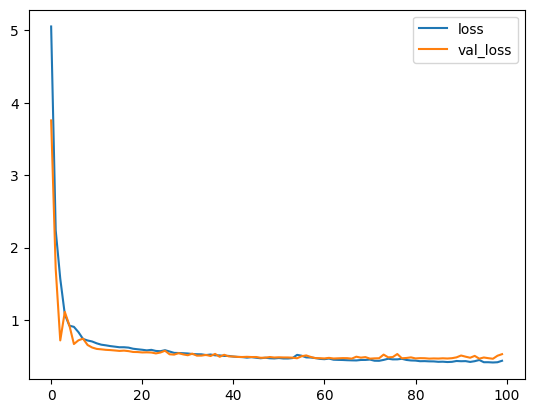

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

Notice how the loss flattens out as the epochs go by. When the loss curve becomes like this, it means the model has learned all it can, and there's no point in continuing training for more epochs.


# Classification task

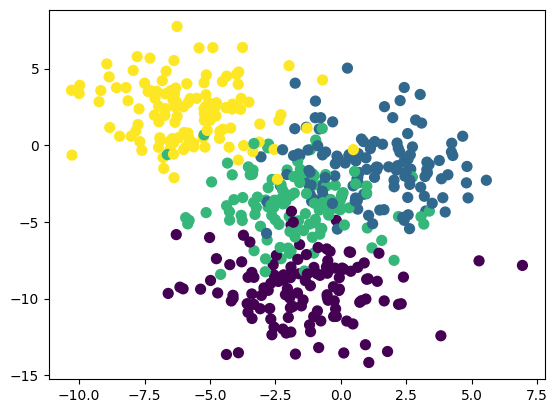

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(500, 2, centers = 4, random_state=2, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);

#Let's examine X and y


In [ ]:
print(X[:10])
print(y[:10])

[[ -0.17719387  -4.89705934]
 [ -6.49984446   3.55613952]
 [ -4.37345118 -13.64677923]
 [ -2.2818913   -7.39746205]
 [ -3.7159428   -0.02291661]
 [ -3.53530837  -1.41299822]
 [  0.58507297  -0.72268008]
 [  0.97804728  -3.16121347]
 [ -1.11658179  -3.65906656]
 [ -2.05426997  -1.61505894]]
[0 3 0 2 3 2 2 1 1 2]


#Split the data into training and test parts, transform y into one hot encoding

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # első felosztás train, teszt halmazokra

y_train = tf.keras.utils.to_categorical(y_train, 4)
y_test = tf.keras.utils.to_categorical(y_test, 4)

In [ ]:
y_train[:5]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

#Let's create the architecture with 3 hidden layers with 64 neurons each
Pay attention to the input/output dimension, activations!


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[2]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

#Compile with the optimizer, loss, metric
Attention to the classification task!

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


#Fit the model

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=200,
)

Epoch 1/200
2/2 [==============================] - 2s 215ms/step - loss: 1.2278 - accuracy: 0.4625 - val_loss: 1.0912 - val_accuracy: 0.5500
Epoch 2/200
2/2 [==============================] - 0s 34ms/step - loss: 1.0860 - accuracy: 0.5675 - val_loss: 0.9866 - val_accuracy: 0.6300
Epoch 3/200
2/2 [==============================] - 0s 35ms/step - loss: 0.9880 - accuracy: 0.5800 - val_loss: 0.9112 - val_accuracy: 0.6000
Epoch 4/200
2/2 [==============================] - 0s 36ms/step - loss: 0.9195 - accuracy: 0.5900 - val_loss: 0.8574 - val_accuracy: 0.6200
Epoch 5/200
2/2 [==============================] - 0s 35ms/step - loss: 0.8654 - accuracy: 0.6100 - val_loss: 0.8163 - val_accuracy: 0.6300
Epoch 6/200
2/2 [==============================] - 0s 49ms/step - loss: 0.8223 - accuracy: 0.6150 - val_loss: 0.7831 - val_accuracy: 0.6300
Epoch 7/200
2/2 [==============================] - 0s 52ms/step - loss: 0.7852 - accuracy: 0.6225 - val_loss: 0.7544 - val_accuracy: 0.6400
Epoch 8/200
2/2 [==

#Let's examine the losses!

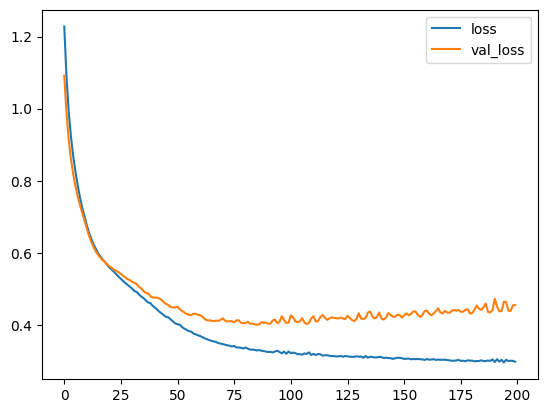

In [ ]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [ ]:
import numpy as np

rng = np.random.RandomState(0) # véletlen pontok generálása a tanítóadatok körül
Xnew = [-15,-15]+ [25, 25] * rng.rand(2000,2)
ynew = model.predict(Xnew)

63/63 [==============================] - 0s 2ms/step


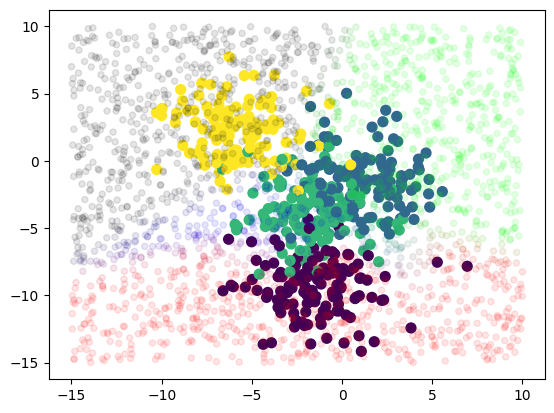

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50) #tanító adatok kirajzolása
lim = plt.axis() # az ábrázolásnál a tanító adatok jelentik a határt
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, alpha=0.1) # a teszt pontok kirajzolása
#plt.axis(lim);

# Introduction

Recall from the example in the previous part that Keras preserves a history of the training and validation loss across epochs as it trains a model. In this part we will learn how to interpret these learning curves and use them to guide model development. In particular we will examine learning curves for evidence of *underfitting* and *overfitting*, and we'll look at a few strategies for correcting them.

# Interpreting Learning Curves

There are two ways to think about the information contained in training data: *signal* and *noise*. The signal is the part that is generalizable, the part that can help our model make predictions from new data. The noise is the part that is *only* true for the training data; noise is all the random fluctuations that come from real-world data, or all the random, non-informative patterns that don't actually help the model make predictions. Noise is the part that might seem helpful, but actually isn't.

We train our model by choosing weights, or parameters, that minimize the loss on a training set. You might know that to accurately evaluate a model's performance, however, we must evaluate it on a new dataset, the *validation* data.

As we train a model, we plot the loss across epochs on the training set. We add a plot of the validation data as well. These plots are called **learning curves**.  We need to be able to interpret these curves to effectively train deep learning models.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/tHiVFnM.png" width="500" alt="Graph of training and validation loss.">
<figcaption style="textalign: center; font-style: italic"><center>Validation loss gives an estimate of the error expected on unseen data.
</center></figcaption>
</figure>

Now, the training loss will decrease either when the model learns signal or when it learns noise. The validation loss, however, will only decrease when the model learns signal. (Any noise the model has learned from the training set will not generalize to new data). So, both curves will decrease when the model learns signal, but when it learns noise, a *gap* will form between the curves. The size of the gap indicates how much noise the model has learned.

Ideally, we would create models that learn all the signal and none of the noise. This will practically never happen. Instead, we engage in a trade-off. We can push our model to learn more signal at the cost of learning more noise. As long as the trade-off is in our favor, the validation loss will continue to decrease. After a certain point however, the trade-off can turn against us, the cost will outweigh the benefit, and the validation loss will start to increase.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/eUF6mfo.png" width="600" alt="Two graphs. On the left, a line through a few data points with the true fit a parabola. On the right, a curve running through each datapoint with the true fit a parabola.">
<figcaption style="textalign: center; font-style: italic"><center>Underfitting and overfitting.
</center></figcaption>
</figure>

This trade-off means that there are two problems that we might encounter when training a model: not enough signal, or too much noise. **Underfitting** on the training set is when the loss is not as low as it could be, because the model has not learned enough *signal*. **Overfitting** on the training set is when the loss is not as low as it could be, because the model has learned too much *noise*. The trick to training deep learning models is to find the best balance between the two.

We will look at a few ways to coax more signal out of our training data, while reducing the amount of noise.

# Capacity

The **capacity** of a model refers to the size and complexity of the patterns it can learn. For neural networks, this is largely determined by how many neurons it has and how they are connected. If a network seems to be underfitting the data, you might try increasing its capacity.

You can increase the capacity of a network by making it *wider* (more units in existing layers) or *deeper* (adding more layers). **Wider networks are better at learning more linear relationships, while deeper networks are better at learning more nonlinear relationships.** Which is better will depend on your dataset.

```
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])
```


# Early Stopping
We mentioned that if a model is learning noise too eagerly, the validation loss will start to increase during training. To prevent this, we can simply stop training when the validation loss seems to no longer be decreasing. This kind of interruption of training is called **early stopping**.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/eP0gppr.png" width=500 alt="Graph of learning curves with early stopping at the minimal validation loss, underfitting to the left, overfitting to the right.">.
<figcaption style="textalign: center; font-style: italic"><center>We save the model at the point where the validation loss was minimal.
</center></figcaption>
</figure>

As soon as we detect that the validation loss is starting to increase, we can roll back the weights to where they were at the minimum. This ensures that the model doesn't continue to learn noise and overfit the data.

Using early stopping also means that we're less likely to stop training too early, before the network has finished learning all the signal. So besides preventing overfitting from training too long, early stopping can also prevent *underfitting* from training not long enough. Just set the number of training epochs to some large number (more than you will need), and early stopping will take care of the rest.

## Adding Early Stopping

In Keras, early stopping is implemented as a callback. A **callback** is simply a function that we want to run at times during the training of our network. The early stopping callback will run after each epoch. (Keras comes with [several useful callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) pre-defined, but you can also [define your own](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback).)
"""

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

These parameters tell it: "If the validation loss hasn't improved by at least 0.001 for the last 20 epochs, then stop training and keep the model that was found to be best." Sometimes it can be hard to tell if the validation loss is increasing because of overfitting or just because of random batch fluctuations. The parameters let us set some tolerance for when to stop.

As we will see in our example, this callback is passed to the `fit` method along with the loss and optimizer.

# Example - Model Training with Early Stopping

Let's continue developing the model from the previous example. We'll increase the network's capacity, but we'll also add an early stopping callback to prevent overfitting.

Here is the data preparation again.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

red_wine = pd.read_csv('https://raw.githubusercontent.com/karsarobert/DeepLearning2024/main/red-wine.csv')

y = red_wine.quality #X,y beállítása
X = red_wine.drop(['quality'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # első felosztás train, teszt halmazokra

# Scale to [0, 1]
max_ = X_train.max(axis=0)
min_ = X_train.min(axis=0)
X_train = (X_train - min_) / (max_ - min_)
X_test = (X_test - min_) / (max_ - min_)

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#import tensorflow as tf
#y.describe()
#y.unique()
#y_train = tf.keras.utils.to_categorical(y_train)
#y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
701,0.212389,0.363014,0.02,0.082759,0.090301,0.098592,0.069853,0.523495,0.574803,0.203593,0.169231
56,0.495575,0.205479,0.57,0.172414,0.096990,0.042254,0.014706,0.516153,0.236220,0.179641,0.184615
142,0.053097,0.150685,0.00,0.062069,0.063545,0.366197,0.209559,0.112335,0.740157,0.275449,0.861538
863,0.230088,0.342466,0.06,0.110345,0.110368,0.225352,0.286765,0.542584,0.606299,0.119760,0.200000
1387,0.247788,0.356164,0.07,0.062069,0.147157,0.098592,0.062500,0.442731,0.440945,0.149701,0.184615


Now we'll increase the capacity of our network. We're choosing a fairly large network, but we'll rely on the callback to stop training as soon as the validation loss shows signs of increasing.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Once you've defined the callback, add it as an argument to `fit` (you can have multiple, so put them in a list). When using early stopping, choose a large number of epochs, more than you will need.

Epoch 1/500
5/5 [==============================] - 2s 44ms/step - loss: 4.8844 - val_loss: 3.1842
Epoch 2/500
5/5 [==============================] - 0s 15ms/step - loss: 1.8843 - val_loss: 1.9291
Epoch 3/500
5/5 [==============================] - 0s 10ms/step - loss: 1.2635 - val_loss: 1.0578
Epoch 4/500
5/5 [==============================] - 0s 12ms/step - loss: 1.1729 - val_loss: 0.7582
Epoch 5/500
5/5 [==============================] - 0s 9ms/step - loss: 0.8937 - val_loss: 0.8966
Epoch 6/500
5/5 [==============================] - 0s 13ms/step - loss: 0.8338 - val_loss: 0.8003
Epoch 7/500
5/5 [==============================] - 0s 11ms/step - loss: 0.7724 - val_loss: 0.6513
Epoch 8/500
5/5 [==============================] - 0s 14ms/step - loss: 0.7183 - val_loss: 0.6123
Epoch 9/500
5/5 [==============================] - 0s 18ms/step - loss: 0.6862 - val_loss: 0.6038
Epoch 10/500
5/5 [==============================] - 0s 17ms/step - loss: 0.6595 - val_loss: 0.6028
Epoch 11/500
5/5 [==

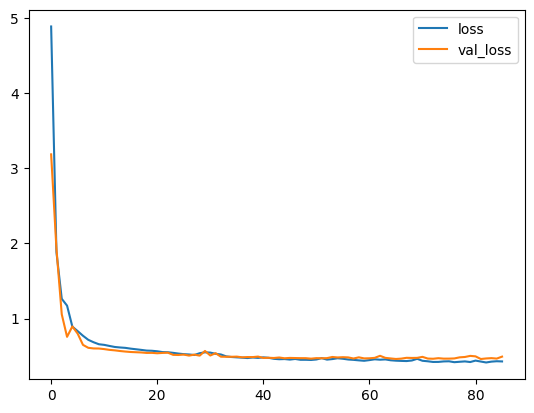

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # 0 turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

And indeed, Keras stopped training well before the full 500 epochs!



In [ ]:
model.predict(np.array([0.362832,0.349315,0.234,0.3456,0.123,0.112551,1,1,1,1,1]).reshape(1,-1))

1/1 [==============================] - 0s 67ms/step


array([[6.796058]], dtype=float32)

# Introduction

The world of deep learning is more than dense layers. You can add dozens of kinds of layers to a model. (Try browsing the [Keras docs](https://www.tensorflow.org/api_docs/python/tf/keras/layers/) for an example!) Some, like dense layers, define connections between neurons, while others might perform preprocessing or other kinds of transformations.

In this section we will learn about two specialized kinds of layers that don't actually contain any neurons, but add functionality that can sometimes be advantageous in different ways to a model. Both are commonly used in modern architectures.

# Dropout

The first of these is the "dropout layer," which can help to correct for overfitting.

In the previous section, we talked about how overfitting occurs because the network learns spurious patterns in the training data. Recognizing these spurious patterns often requires the network to rely on very specific combinations of weights, a kind of "co-dependence" between the weights.
The fully connected layer occupies most of the parameters, so neurons develop co-dependence between each other during training, which inhibits the individual performance of each neuron, leading to overfitting to the training data. Since they are so specific, they tend to be fragile: remove one and the co-dependence collapses.

This is the idea behind **dropout**. To break up these conspiracies, at each step of training, a fraction of the input units to a layer are randomly *dropped out*, making it much harder for the network to learn these spurious patterns in the training data. Instead, it has to look for broad, general patterns, the weight patterns for which are generally more robust.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/a86utxY.gif" width="600" alt="An animation of a network cycling through various random dropout configurations.">
<figcaption style="textalign: center; font-style: italic"><center>Here, 50% dropout has been added between the two hidden layers.</center></figcaption>
</figure>

You can also think of dropout as creating a kind of *ensemble* of networks. The predictions are no longer made by a single large network, but by a committee of smaller networks. The individuals in the committee will tend to make different errors, but will also be right some of the time, so the committee as a whole will be better than any individual. (If you are familiar with random forests, as an ensemble of decision trees, then this is the same idea).

## Adding Dropout

In Keras, the dropout rate is specified by the argument `rate`, which determines what percentage of input units are dropped out. The `Dropout` layer is placed immediately before the layer we want to apply dropout to:

```
keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])
```

# Batch Normalization

The next specialized layer we'll look at performs "batch normalization" (or "batchnorm"), which can help to correct for slow or unstable training.

**Batch normalization applies a transformation that keeps the mean output close to zero and the output standard deviation close to one.**

It's generally a good idea in neural networks to scale all the data to a common scale, perhaps with something like the scikit-learn [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) or [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). This is because SGD will shift network weights proportionally to how much activation the data produces. Features that tend to produce activations of very different magnitudes can lead to unstable training behavior.

Well, if it's good to normalize data before it goes into the network, perhaps it would be even better to normalize within the network! Indeed, we have a special layer for this, the **batch normalization layer**. The batch normalization layer looks at each batch as it comes in, first normalizes the batch with its own mean and standard deviation, then rescales the data to a new scale with two trainable rescaling parameters. Batchnorm is essentially performing a kind of coordinated rescaling across its inputs.

Batchnorm is most often added as a helper to the optimization process (though it can sometimes help prediction performance too). Models with batchnorm often require fewer epochs to finish training. Additionally, batchnorm can fix some problems that cause training to "stall". Consider adding batch normalization to your models, especially if you are encountering problems during training.

## Adding Batch Normalization

Batch normalization seems to be usable pretty much anywhere in a network. We can place it after a layer...

```
layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
```

...or between a layer and its activation function:

```
layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),
```

And if you add it as the first layer of your network, it can act as a kind of adaptive preprocessor, replacing things like the Sci-Kit Learn "StandardScaler" for example.

# Example - Using Dropout and Batch Normalization

Let's continue developing the *Red Wine* model. Now we'll increase capacity even more, but we'll add dropout to control overfitting and batch normalization to speed up optimization. This time we will also leave out standardization of the data, to show how batch normalization can help stabilize training.

When adding dropout, you might need to increase the number of units in the 'Dense' layers.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([

    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

This time, we don't need to change how we train.

Epoch 1/100
5/5 [==============================] - 4s 66ms/step - loss: 5.5815 - val_loss: 5.3581
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 5.3900 - val_loss: 5.2297
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 5.1698 - val_loss: 4.9457
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 4.9547 - val_loss: 4.6431
Epoch 5/100
5/5 [==============================] - 0s 17ms/step - loss: 4.7064 - val_loss: 4.2273
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 4.4374 - val_loss: 3.7042
Epoch 7/100
5/5 [==============================] - 0s 18ms/step - loss: 4.0920 - val_loss: 3.0527
Epoch 8/100
5/5 [==============================] - 0s 16ms/step - loss: 3.7881 - val_loss: 2.7229
Epoch 9/100
5/5 [==============================] - 0s 16ms/step - loss: 3.3490 - val_loss: 2.3362
Epoch 10/100
5/5 [==============================] - 0s 18ms/step - loss: 2.9833 - val_loss: 1.8340
Epoch 11/100
5/5 [=

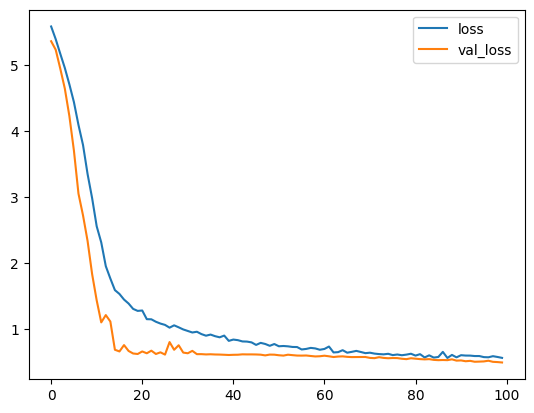

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=100,
    verbose=1,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

You will typically achieve better performance if you standardize your data before using it for training. However, the fact that we were able to use the raw data at all shows how powerful batch normalization can be on more difficult datasets.


# Binary Classification

In previous parts of this course, we've learned how to use neural networks to solve regression problems. Now, we'll apply neural networks to another common machine learning problem: classification. Most of what we've learned so far will still hold true. The main differences are in the loss function we use, and in the kind of outputs we want the final layer to produce.


Classification into one of two classes is a common machine learning problem. We might want to predict whether a customer is likely to purchase something, whether a credit card transaction was fraudulent, whether deep-space signals are indicative of a new planet, or whether a medical test indicates evidence of a disease. These are all examples of **binary classification** problems.

In raw data, the classes might be represented by strings like "Yes" and "No", or "Dog" and "Cat". Before we can use the data, we assign a **class label**: one class will be "0", the other "1".  Assigning numerical labels gets the data into a form that the neural network can use.

# Accuracy and Cross-Entropy

**Accuracy** is one of many metrics used to measure the success of a classification problem. Accuracy is the proportion of correct predictions out of all predictions: `Accuracy = number_correct / total`. A model that always predicts correctly would have an accuracy of `1.0`. If all other factors are equal, accuracy is a reasonable metric if the classes are represented with roughly equal frequency in the dataset.

The problem with accuracy (and most other classification metrics) is that it can't be used as a loss function. SGD needs a loss function that changes smoothly, but accuracy, as a ratio of numbers, changes in a "jump" manner. So we have to choose a substitute function to act as our loss function. That substitute is the *cross-entropy* function.

Recall that the loss function defines the *goal* of the network during training. With regression, our goal was to minimize the distance between the desired output and the predicted output. We chose MAE to measure this distance.

For classification, instead, we want to minimize the distance between *probabilities*, and cross-entropy provides that. **Cross-entropy** is a kind of measure of the distance between one probability distribution and another.




<figure style="padding: 1em;">
<img src="https://i.imgur.com/DwVV9bR.png" width="400" alt="Graphs of accuracy and cross-entropy.">
<figcaption style="textalign: center; font-style: italic"><center>Cross-entropy penalizes incorrect probability predictions.</center></figcaption>
</figure>

The idea is that we want our network to predict the correct class with probability 1.0. The further the predicted probability is from `1.0`, the higher the cross-entropy loss will be.

The technical reasons for using cross-entropy are a bit involved, but the main takeaway from this section is: use cross-entropy as a classification loss; other metrics that might be important (like accuracy) will improve along with it.

# Making Probabilities with the Sigmoid Function

The cross-entropy and accuracy functions both require probabilities as input, which are numbers between 0 and 1. To transform the real-valued outputs produced by a dense layer into probabilities, we attach a new kind of activation function, the **sigmoid activation**.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/FYbRvJo.png" width="400" alt="The sigmoid graph is an 'S' shape with horizontal asymptotes at 0 to the left and 1 to the right. ">
<figcaption style="textalign: center; font-style: italic"><center>The sigmoid function maps real numbers into the interval $[0, 1]$.</center></figcaption>
</figure>

To make the final class prediction, we define a *threshold* probability. This is typically 0.5, so that rounding will give us the correct class: below 0.5 will be the class labeled 0, and 0.5 or above will be the class labeled 1. A threshold of 0.5 is what Keras uses by default with its [accuracy metric] (https://www.tensorflow.org/api_docs/python/tf/keras/metrics/BinaryAccuracy).


#Assignment 1

Change the red wine quality task we practiced above into a classification task, that is, transform y using one hot encoding and adapt the corresponding model accordingly.
Let it have 3 hidden layers with 1024 neurons per layer, 30% dropout, early stopping. The metric should be accuracy! Evaluate the losses!